# Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split


/home/ai21btech11012/.local/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [4]:
## If you need to install anything
# !pip install scikit-learn
# !pip install xgboost

In [5]:
# Read the CSV file
k = 5
df = pd.read_csv(f'../data/processed/combined/{k}_ODI.csv')

# Convert date column to datetime format (if not already)
df["date"] = pd.to_datetime(df["date"])

training_cutoff_date = pd.Timestamp("2010-01-01")

df = df[df["date"] > training_cutoff_date]

# Print the head of the dataframe
print(df.head())

# Print the shape of the dataframe
print(df.shape)


      player       team    opposition       date                 venue  \
0  PJ Hughes  Australia      Pakistan 2014-10-12  Sheikh Zayed Stadium   
1  PJ Hughes  Australia  South Africa 2014-09-06    Harare Sports Club   
2  PJ Hughes  Australia  South Africa 2014-09-02    Harare Sports Club   
3  PJ Hughes  Australia      Zimbabwe 2014-08-31    Harare Sports Club   
4  PJ Hughes  Australia  South Africa 2014-08-27    Harare Sports Club   

          match_type  match_id player_id  fantasy_points  \
0  international-ODI    727923  004c9e85               5   
1  international-ODI    736455  004c9e85              17   
2  international-ODI    736451  004c9e85              98   
3  international-ODI    736449  004c9e85              10   
4  international-ODI    736445  004c9e85              63   

   batting_fantasy_points  ...  last_5_matches_match_type_Wickets_sum  \
0                       5  ...                                    0.0   
1                      17  ...                  

In [6]:
# Convert to a list and print in a readable format
print(list(df.columns))


['player', 'team', 'opposition', 'date', 'venue', 'match_type', 'match_id', 'player_id', 'fantasy_points', 'batting_fantasy_points', 'bowling_fantasy_points', 'fielding_fantasy_points', 'Total_matches_played_sum', 'inning', 'year', 'cumulative_Innings Batted_sum', 'last_5_matches_Innings Batted_sum', 'cumulative_Runs_sum', 'last_5_matches_Runs_sum', 'cumulative_Fours_sum', 'last_5_matches_Fours_sum', 'cumulative_Sixes_sum', 'last_5_matches_Sixes_sum', 'cumulative_Outs_sum', 'last_5_matches_Outs_sum', 'cumulative_Dot Balls_sum', 'last_5_matches_Dot Balls_sum', 'cumulative_Balls Faced_sum', 'last_5_matches_Balls Faced_sum', 'cumulative_Innings Bowled_sum', 'last_5_matches_Innings Bowled_sum', 'cumulative_Balls Bowled_sum', 'last_5_matches_Balls Bowled_sum', 'cumulative_Wickets_sum', 'last_5_matches_Wickets_sum', 'cumulative_LBWs_sum', 'last_5_matches_LBWs_sum', 'cumulative_Bowleds_sum', 'last_5_matches_Bowleds_sum', 'cumulative_Extras_sum', 'last_5_matches_Extras_sum', 'cumulative_Maiden

In [7]:
# The target variable is 'fantasy_points, I was hoping to have 3 fantasy points columns, each for batting, nowling and fielding. 
# Then, do some feature engineering using exploratory data analysis between predictors and target variable, for each of them.
# Also, find the correlation between the predictors and the target variable.
# Also, find the best k for rolling average for each of the predictors ? or the same k for all predictors ?
# Or some kind of transformation for the predictors, like log transformation, etc.
# Key components include feature creation from existing data, transforming and imputing missing or invalid features, 
# # reducing data dimensionality through methods like Principal Components Analysis (PCA), Independent Component Analysis (ICA), and Linear Discriminant Analysis (LDA), and selecting the most relevant features for model training based on importance scores and correlation matrices.[10]

In [8]:
# Feature explosion occurs when the number of identified features is too large for effective model estimation or optimization. Common causes include:

# Feature templates - implementing feature templates instead of coding new features
# Feature combinations - combinations that cannot be represented by a linear system
# Feature explosion can be limited via techniques such as: regularization, kernel methods, and feature selection.

In [9]:
batting_cols = [
    'player', 'team', 'opposition', 'date', 'venue', 'match_type', 'match_id', 'player_id', 'batting_fantasy_points',
    "Total_matches_played_sum", "cumulative_Innings Batted_sum", f"last_{k}_matches_Innings Batted_sum",
    "cumulative_Runs_sum", f"last_{k}_matches_Runs_sum", "cumulative_Fours_sum", f"last_{k}_matches_Fours_sum",
    "cumulative_Sixes_sum", f"last_{k}_matches_Sixes_sum", "cumulative_Outs_sum", f"last_{k}_matches_Outs_sum",
    "cumulative_Dot Balls_sum", f"last_{k}_matches_Dot Balls_sum", "cumulative_Balls Faced_sum",
    f"last_{k}_matches_Balls Faced_sum", f"last_{k}_matches_centuries_sum", f"last_{k}_matches_half_centuries_sum",
    f"last_{k}_matches_duck_outs_sum", "last_year_avg_Runs",
    "cumulative_derived_Batting Strike Rate", "cumulative_derived_Batting Avg", "cumulative_derived_Mean Score",
    "cumulative_derived_Boundary%", "cumulative_derived_Mean Balls Faced", "cumulative_derived_Dismissal Rate",
    f"last_{k}_matches_derived_Batting Strike Rate", f"last_{k}_matches_derived_Batting Avg", f"last_{k}_matches_derived_Mean Score",
    f"last_{k}_matches_derived_Boundary%", f"last_{k}_matches_derived_Mean Balls Faced", f"last_{k}_matches_derived_Dismissal Rate",
    "cumulative_Venue_Runs_sum", f"last_{k}_matches_Venue_Runs_sum", "cumulative_Opposition_Runs_sum",
    f"last_{k}_matches_Opposition_Runs_sum", "cumulative_match_type_Runs_sum", f"last_{k}_matches_match_type_Runs_sum",
    "venue_avg_runs_sum", "league_avg_runs_sum"
]

print(batting_cols.__len__())
df_batting = df[batting_cols].copy()


48


### EDA for Batting df

Missing Values:
 Series([], dtype: int64)


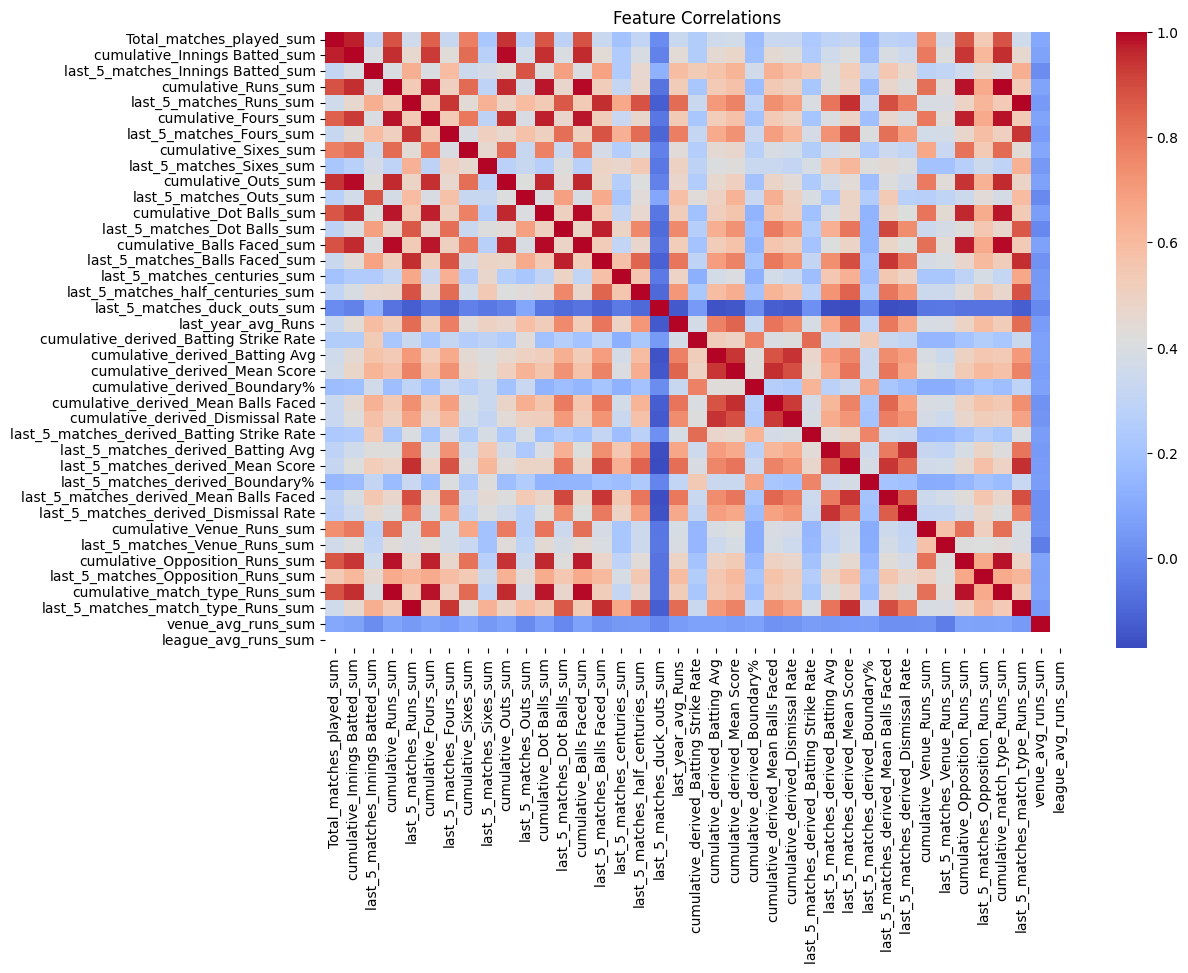

In [10]:
# 1. Check for missing values
missing_values = df_batting.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])


# 2. Separate categorical and numerical columns
categorical_cols = ['player', 'team', 'opposition', 'date', 'venue', 'match_type', 'match_id', 'player_id']
numerical_cols = [col for col in df_batting.columns if col not in categorical_cols and col != 'batting_fantasy_points']

# 4. Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_batting[numerical_cols].corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlations")
plt.show()


In [11]:
# 1. Correlation Analysis to Identify Important Features
numerical_cols_with_target = numerical_cols + ['batting_fantasy_points']
correlation_matrix = df[numerical_cols_with_target].corr()

# Get correlation of features with target variable
target_correlation = correlation_matrix["batting_fantasy_points"].abs().sort_values(ascending=False)
print(target_correlation)

batting_fantasy_points                        1.000000
cumulative_derived_Mean Score                 0.381694
cumulative_derived_Mean Balls Faced           0.373790
last_year_avg_Runs                            0.361618
last_5_matches_Balls Faced_sum                0.357918
last_5_matches_Runs_sum                       0.354716
last_5_matches_match_type_Runs_sum            0.354707
last_5_matches_Dot Balls_sum                  0.343976
last_5_matches_Fours_sum                      0.342177
last_5_matches_derived_Mean Balls Faced       0.333930
cumulative_derived_Batting Avg                0.332857
last_5_matches_derived_Mean Score             0.332360
cumulative_derived_Dismissal Rate             0.321866
last_5_matches_Outs_sum                       0.309921
last_5_matches_half_centuries_sum             0.299540
last_5_matches_Opposition_Runs_sum            0.293443
cumulative_Fours_sum                          0.293364
cumulative_Runs_sum                           0.289567
cumulative

In [12]:
# 2. Dropping Highly Correlated Features
# Highly correlated features can cause multicollinearity, leading to redundancy in the model.

# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr().abs()

# Select the upper triangle of the correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find pairs of columns with correlation greater than threshold (e.g., 0.85)
correlated_pairs = []
high_correlation_features = set()
threshold = 0.9

for col in upper_tri.columns:
    for row in upper_tri.index:
        if upper_tri.loc[row, col] > threshold:
            correlated_pairs.append((row, col, upper_tri.loc[row, col]))
            high_correlation_features.add(col)  # Mark the second column for removal

# Convert to DataFrame for better readability
correlated_df = pd.DataFrame(correlated_pairs, columns=["Feature_1", "Feature_2", "Correlation"])

# Drop highly correlated features
df_reduced = df.drop(columns=list(high_correlation_features))

# Print results
print(f"Highly correlated feature pairs (features with correlation > {threshold}):")
# print(correlated_df.sort_values(by="Correlation", ascending=False))

print(f"\nDropped features due to high correlation: {list(high_correlation_features)}")
print(f"Number of dropped features: {len(high_correlation_features)}")
correlated_df.sort_values(by="Correlation", ascending=False)


Highly correlated feature pairs (features with correlation > 0.9):

Dropped features due to high correlation: ['cumulative_Dot Balls_sum', 'last_5_matches_derived_Dismissal Rate', 'cumulative_Balls Faced_sum', 'cumulative_derived_Mean Score', 'cumulative_Innings Batted_sum', 'cumulative_Runs_sum', 'last_5_matches_Balls Faced_sum', 'cumulative_Opposition_Runs_sum', 'cumulative_Fours_sum', 'last_5_matches_Fours_sum', 'cumulative_derived_Mean Balls Faced', 'cumulative_Outs_sum', 'cumulative_derived_Dismissal Rate', 'last_5_matches_derived_Mean Score', 'last_5_matches_match_type_Runs_sum', 'last_5_matches_derived_Mean Balls Faced', 'cumulative_match_type_Runs_sum']
Number of dropped features: 17


,Feature_1,Feature_2,Correlation
36,cumulative_Runs_sum,cumulative_match_type_Runs_sum,0.999995
42,last_5_matches_Runs_sum,last_5_matches_match_type_Runs_sum,0.999988
17,cumulative_Dot Balls_sum,cumulative_Balls Faced_sum,0.994511
14,cumulative_Runs_sum,cumulative_Balls Faced_sum,0.993217
40,cumulative_Balls Faced_sum,cumulative_match_type_Runs_sum,0.993211
6,cumulative_Innings Batted_sum,cumulative_Outs_sum,0.991725
3,cumulative_Runs_sum,cumulative_Fours_sum,0.986277
37,cumulative_Fours_sum,cumulative_match_type_Runs_sum,0.986270
41,cumulative_Opposition_Runs_sum,cumulative_match_type_Runs_sum,0.983388
30,cumulative_Runs_sum,cumulative_Opposition_Runs_sum,0.983384


In [13]:
def compute_vif(df, numerical_cols):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = numerical_cols
    vif_data["VIF"] = [variance_inflation_factor(df[numerical_cols].values, i) for i in range(len(numerical_cols))]
    return vif_data

vif_df = compute_vif(df, numerical_cols)

threshold = 10

# Identify features with high VIF (threshold > 5 or 10)
high_vif_features = vif_df[vif_df["VIF"] > threshold]["Feature"].tolist()

# Drop features with high VIF
df_reduced = df.drop(columns=high_vif_features)

# Print results
print("Features with high VIF (indicating multicollinearity):")
print(vif_df.sort_values(by="VIF", ascending=False))

print(f"\nDropped features due to high VIF: {high_vif_features}")
print(f"Number of dropped features: {len(high_vif_features)}")


Features with high VIF (indicating multicollinearity):
                                       Feature            VIF
3                          cumulative_Runs_sum  289640.662210
35              cumulative_match_type_Runs_sum  280286.174853
4                      last_5_matches_Runs_sum  120015.606626
36          last_5_matches_match_type_Runs_sum  119001.281623
13                  cumulative_Balls Faced_sum   16945.383922
11                    cumulative_Dot Balls_sum    4562.090850
14              last_5_matches_Balls Faced_sum    1198.388092
5                         cumulative_Fours_sum     750.542265
1                cumulative_Innings Batted_sum     427.154960
12                last_5_matches_Dot Balls_sum     296.226650
27           last_5_matches_derived_Mean Score     232.193834
9                          cumulative_Outs_sum     226.687463
29     last_5_matches_derived_Mean Balls Faced     210.987200
21               cumulative_derived_Mean Score     181.783424
23         cumu

### Define a generic function for train and evaluate 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


# Function to train and evaluate models, and return predictions from the best model
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    best_model = None
    best_rmse = float("inf")
    best_predictions = None

    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Compute metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)

        # Store results
        results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2 Score": r2, "MAPE": mape}

        # Track the best model (lowest RMSE)
        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model
            best_predictions = y_pred

    return pd.DataFrame(results).T, best_predictions

##  Feature Importance from Tree-Based Models (Random Forest)
1. Tree-based models like Random Forest, XGBoost, or LightGBM assign feature importance based on how much they reduce impurity (e.g., Gini impurity in classification or variance in regression).
2. More important features appear higher in the trees and contribute more to predictions.

Advantages:

✅ Captures non-linear relationships.
✅ Can handle multicollinearity well.
✅ Works well with both small & large datasets.
✅ Can be used with missing values.

Disadvantages:

❌ Can be computationally expensive for large datasets.
❌ Feature importance can fluctuate if the dataset is small.

In [15]:
# Split data
X = df[numerical_cols_with_target].drop(columns=["batting_fantasy_points"])
y = df["batting_fantasy_points"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Define threshold
importance_threshold = 0.01  # Adjust based on dataset

# Select important features
batting_selected_features_rf = feature_importance[feature_importance > importance_threshold].index.tolist()

# Drop unimportant features
df_reduced = df[batting_selected_features_rf + ["batting_fantasy_points"]]

print("Dropped features due to low importance:", set(X.columns) - set(batting_selected_features_rf))
print("Number of dropped features:", len(set(X.columns) - set(batting_selected_features_rf)))

Dropped features due to low importance: {'last_5_matches_Outs_sum', 'cumulative_Innings Batted_sum', 'last_5_matches_centuries_sum', 'league_avg_runs_sum', 'last_5_matches_duck_outs_sum', 'last_5_matches_Innings Batted_sum', 'last_5_matches_half_centuries_sum'}
Number of dropped features: 7


In [16]:
# Define cutoff date
cutoff_date = pd.Timestamp("2024-01-31")

# Split based on date
train_data = df[df["date"] < cutoff_date]
test_data = df[df["date"] >= cutoff_date]

# Select features (excluding 'date')
X_train, y_train = train_data[batting_selected_features_rf], train_data["batting_fantasy_points"]
X_test, y_test = test_data[batting_selected_features_rf], test_data["batting_fantasy_points"]

# Define models to test
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR (Support Vector Regression)": SVR(kernel="rbf"),
    "XGBRegressor": XGBRegressor(n_estimators=500, learning_rate=0.05)
}

# Train and evaluate
batting_results, predicted_batting_points = train_and_evaluate(models, X_train, X_test, y_train, y_test)

# Print model performance
print(batting_results)

/home/ai21btech11012/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.528e+07, tolerance: 3.763e+03
  model = cd_fast.enet_coordinate_descent(


                                        MSE       RMSE        MAE  R2 Score  \
Linear Regression                758.388280  27.538850  19.329263  0.104164   
Ridge Regression                 758.388716  27.538858  19.329285  0.104164   
Lasso Regression                 758.866772  27.547537  19.341090  0.103599   
Random Forest                    788.383745  28.078172  20.448397  0.068733   
SVR (Support Vector Regression)  899.480456  29.991340  17.928248 -0.062499   
XGBRegressor                     768.109030  27.714780  19.405710  0.092682   

                                         MAPE  
Linear Regression                1.217292e+16  
Ridge Regression                 1.217289e+16  
Lasso Regression                 1.216749e+16  
Random Forest                    1.436730e+16  
SVR (Support Vector Regression)  5.219617e+15  
XGBRegressor                     1.224209e+16  


## 2. Mutual Information (MI) for Feature Selection
1. Mutual Information (MI) measures how much information a feature provides about the target.
2. Unlike correlation, MI detects non-linear dependencies.

Advantages:

✅ Captures non-linear relationships.
✅ Works well for both continuous & categorical features.
✅ Not affected by multicollinearity.

Disadvantages:

❌ Computationally expensive for large datasets.
❌ Less intuitive compared to correlation.

When to Use?

When non-linear relationships exist between features and target.


In [17]:
from sklearn.feature_selection import mutual_info_regression

# Compute MI scores
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Define threshold
mi_threshold = 0.03  # Adjust based on dataset

# Select features
batting_selected_features_MI = mi_scores[mi_scores > mi_threshold].index.tolist()

# Drop unimportant features
df_reduced_MI = df[batting_selected_features_MI + ["batting_fantasy_points"]]

print("Dropped features due to low mutual information:", set(X.columns) - set(batting_selected_features_MI))

Dropped features due to low mutual information: {'venue_avg_runs_sum', 'last_5_matches_Venue_Runs_sum', 'Total_matches_played_sum', 'last_5_matches_centuries_sum', 'league_avg_runs_sum', 'last_5_matches_duck_outs_sum'}


In [18]:
# # Convert date column to datetime format (if not already)
# df["date"] = pd.to_datetime(df["date"])

# # Define cutoff date
# cutoff_date = pd.Timestamp("2024-08-31")

# # Split based on date
# train_data = df[df["date"] < cutoff_date]
# test_data = df[df["date"] >= cutoff_date]

# # Select features (excluding 'date')
# X_train, y_train = train_data[batting_selected_features_MI], train_data["batting_fantasy_points"]
# X_test, y_test = test_data[batting_selected_features_MI], test_data["batting_fantasy_points"]

# # Define models to test
# models = {
#     "Linear Regression": LinearRegression(),
#     "Ridge Regression": Ridge(alpha=1.0),
#     "Lasso Regression": Lasso(alpha=0.01),
#     "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
#     "SVR (Support Vector Regression)": SVR(kernel="rbf"),
#     "XGBRegressor": XGBRegressor(n_estimators=500, learning_rate=0.05)
# }

# # Train and evaluate
# batting_results2, predicted_batting_points2 = train_and_evaluate(models, X_train, X_test, y_train, y_test)

# # Print model performance
# print(batting_results2)

## 3. Recursive Feature Elimination (RFE)
1. RFE iteratively removes the least important feature and retrains the model.
2. Stops when it reaches the optimal feature subset.

Advantages:

✅ Works with any model (linear, tree-based, etc.).
✅ Automatically chooses the best subset of features.
✅ Helps reduce overfitting.

Disadvantages:

❌ Computationally expensive for large feature sets.
❌ Needs hyperparameter tuning for n_features_to_select.

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Define model
model = LinearRegression()

# RFE selector
n_features_to_select = 20  # Adjust the number of features
rfe = RFE(model, n_features_to_select=n_features_to_select)  
rfe.fit(X, y)

# Select important features
batting_selected_features_RFE = X.columns[rfe.support_].tolist()

# Drop unimportant features
df_reduced_RFE = df[batting_selected_features_RFE + ["batting_fantasy_points"]]

print("Dropped features due to low importance from RFE:", set(X.columns) - set(batting_selected_features_RFE))

print("Number of dropped features:", len(set(X.columns) - set(batting_selected_features_RFE)))

Dropped features due to low importance from RFE: {'last_5_matches_Fours_sum', 'cumulative_Sixes_sum', 'cumulative_Outs_sum', 'last_5_matches_Opposition_Runs_sum', 'cumulative_Dot Balls_sum', 'cumulative_Balls Faced_sum', 'cumulative_Runs_sum', 'last_5_matches_Balls Faced_sum', 'cumulative_Opposition_Runs_sum', 'cumulative_Fours_sum', 'last_5_matches_Venue_Runs_sum', 'cumulative_Venue_Runs_sum', 'last_5_matches_derived_Boundary%', 'league_avg_runs_sum', 'last_5_matches_Dot Balls_sum', 'last_5_matches_derived_Dismissal Rate', 'last_5_matches_derived_Batting Avg', 'last_5_matches_derived_Mean Balls Faced', 'cumulative_match_type_Runs_sum'}
Number of dropped features: 19


In [20]:
# # Convert date column to datetime format (if not already)
# df["date"] = pd.to_datetime(df["date"])

# # Define cutoff date
# cutoff_date = pd.Timestamp("2024-08-31")

# # Split based on date
# train_data = df[df["date"] < cutoff_date]
# test_data = df[df["date"] >= cutoff_date]

# # Select features (excluding 'date')
# X_train, y_train = train_data[batting_selected_features_RFE], train_data["batting_fantasy_points"]
# X_test, y_test = test_data[batting_selected_features_RFE], test_data["batting_fantasy_points"]

# # Define models to test
# models = {
#     "Linear Regression": LinearRegression(),
#     "Ridge Regression": Ridge(alpha=1.0),
#     "Lasso Regression": Lasso(alpha=0.01),
#     "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
#     "SVR (Support Vector Regression)": SVR(kernel="rbf"), 
#     "XGBRegressor": XGBRegressor(n_estimators=500, learning_rate=0.05)
# }

# # Train and evaluate
# batting_results3, predicted_batting_points3 = train_and_evaluate(models, X_train, X_test, y_train, y_test)

# # Print model performance
# print(batting_results3)

In [21]:
bowling_cols = [
    'player', 'team', 'opposition', 'date', 'venue', 'match_type', 'match_id', 'player_id', 'bowling_fantasy_points',
    "Total_matches_played_sum", "cumulative_Innings Bowled_sum", f"last_{k}_matches_Innings Bowled_sum",
    "cumulative_Balls Bowled_sum", f"last_{k}_matches_Balls Bowled_sum", "cumulative_Wickets_sum", f"last_{k}_matches_Wickets_sum",
    "cumulative_LBWs_sum", f"last_{k}_matches_LBWs_sum", "cumulative_Bowleds_sum", f"last_{k}_matches_Bowleds_sum",
    "cumulative_Extras_sum", f"last_{k}_matches_Extras_sum", "cumulative_Maiden Overs_sum", f"last_{k}_matches_Maiden Overs_sum",
    "cumulative_Runsgiven_sum", f"last_{k}_matches_Runsgiven_sum", "cumulative_Dot Balls Bowled_sum",
    f"last_{k}_matches_Dot Balls Bowled_sum", "cumulative_Foursgiven_sum", f"last_{k}_matches_Foursgiven_sum",
    "cumulative_Sixesgiven_sum", f"last_{k}_matches_Sixesgiven_sum", f"last_{k}_matches_3wickets_sum",
    f"last_{k}_matches_4wickets_sum", f"last_{k}_matches_5wickets_sum", "last_year_avg_Wickets",
    "cumulative_derived_Economy Rate", "cumulative_derived_Bowling Dot Ball%", "cumulative_derived_Boundary Given%",
    "cumulative_derived_Bowling Avg", "cumulative_derived_Bowling Strike Rate",
    f"last_{k}_matches_derived_Economy Rate", f"last_{k}_matches_derived_Bowling Dot Ball%",
    f"last_{k}_matches_derived_Boundary Given%", f"last_{k}_matches_derived_Bowling Avg",
    f"last_{k}_matches_derived_Bowling Strike Rate", "cumulative_Venue_Wickets_sum",
    f"last_{k}_matches_Venue_Wickets_sum", "cumulative_Opposition_Wickets_sum", f"last_{k}_matches_Opposition_Wickets_sum",
    "cumulative_match_type_Wickets_sum", f"last_{k}_matches_match_type_Wickets_sum", "venue_avg_wickets_sum", "league_avg_wickets_sum"
]

print(bowling_cols.__len__())
df_bowling = df[bowling_cols].copy()

54


In [22]:
bowling_numerical_cols = [col for col in df_bowling.columns if col not in categorical_cols and col != 'bowling_fantasy_points']


In [23]:
# 1. Correlation Analysis to Identify Important Features
bowling_numerical_cols_with_target = bowling_numerical_cols + ['bowling_fantasy_points']
correlation_matrix = df[bowling_numerical_cols_with_target].corr()

# Get correlation of features with target variable
target_correlation = correlation_matrix["bowling_fantasy_points"].abs().sort_values(ascending=False)
print(target_correlation)

bowling_fantasy_points                        1.000000
last_5_matches_Dot Balls Bowled_sum           0.514745
last_5_matches_Balls Bowled_sum               0.510761
last_5_matches_Runsgiven_sum                  0.495435
last_5_matches_Innings Bowled_sum             0.473304
last_5_matches_Foursgiven_sum                 0.471915
last_5_matches_Wickets_sum                    0.468864
last_5_matches_match_type_Wickets_sum         0.468706
last_5_matches_derived_Bowling Dot Ball%      0.424727
last_year_avg_Wickets                         0.414809
last_5_matches_Extras_sum                     0.385799
last_5_matches_derived_Economy Rate           0.375105
last_5_matches_Sixesgiven_sum                 0.348763
last_5_matches_Opposition_Wickets_sum         0.346687
last_5_matches_Bowleds_sum                    0.345343
last_5_matches_Maiden Overs_sum               0.342441
cumulative_derived_Bowling Dot Ball%          0.333179
last_5_matches_derived_Boundary Given%        0.303217
cumulative

In [24]:
# 2. Dropping Highly Correlated Features
# Highly correlated features can cause multicollinearity, leading to redundancy in the model.

# Compute the correlation matrix
corr_matrix = df[bowling_numerical_cols].corr().abs()

# Select the upper triangle of the correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find pairs of columns with correlation greater than threshold (e.g., 0.85)
correlated_pairs = []
high_correlation_features = set()
threshold = 0.9

for col in upper_tri.columns:
    for row in upper_tri.index:
        if upper_tri.loc[row, col] > threshold:
            correlated_pairs.append((row, col, upper_tri.loc[row, col]))
            high_correlation_features.add(col)  # Mark the second column for removal

# Convert to DataFrame for better readability
correlated_df = pd.DataFrame(correlated_pairs, columns=["Feature_1", "Feature_2", "Correlation"])

# Drop highly correlated features
df_reduced = df.drop(columns=list(high_correlation_features))

# Print results
print(f"Highly correlated feature pairs (features with correlation > {threshold}):")
# print(correlated_df.sort_values(by="Correlation", ascending=False))

print(f"\nDropped features due to high correlation: {list(high_correlation_features)}")
print(f"Number of dropped features: {len(high_correlation_features)}")
correlated_df.sort_values(by="Correlation", ascending=False)


Highly correlated feature pairs (features with correlation > 0.9):

Dropped features due to high correlation: ['cumulative_Bowleds_sum', 'last_5_matches_Runsgiven_sum', 'cumulative_derived_Bowling Dot Ball%', 'cumulative_Opposition_Wickets_sum', 'last_5_matches_derived_Bowling Strike Rate', 'last_5_matches_Foursgiven_sum', 'cumulative_Balls Bowled_sum', 'last_5_matches_Dot Balls Bowled_sum', 'cumulative_Dot Balls Bowled_sum', 'last_5_matches_Balls Bowled_sum', 'cumulative_Wickets_sum', 'cumulative_Runsgiven_sum', 'cumulative_match_type_Wickets_sum', 'cumulative_Sixesgiven_sum', 'last_5_matches_match_type_Wickets_sum', 'cumulative_derived_Bowling Strike Rate', 'last_5_matches_derived_Bowling Dot Ball%', 'cumulative_Foursgiven_sum']
Number of dropped features: 18


,Feature_1,Feature_2,Correlation
41,cumulative_Wickets_sum,cumulative_match_type_Wickets_sum,0.999986
47,last_5_matches_Wickets_sum,last_5_matches_match_type_Wickets_sum,0.999894
11,cumulative_Balls Bowled_sum,cumulative_Dot Balls Bowled_sum,0.994358
6,cumulative_Balls Bowled_sum,cumulative_Runsgiven_sum,0.994074
15,cumulative_Runsgiven_sum,cumulative_Dot Balls Bowled_sum,0.985357
17,last_5_matches_Balls Bowled_sum,last_5_matches_Dot Balls Bowled_sum,0.982208
29,cumulative_derived_Bowling Avg,cumulative_derived_Bowling Strike Rate,0.978457
12,cumulative_Wickets_sum,cumulative_Dot Balls Bowled_sum,0.977997
44,cumulative_Dot Balls Bowled_sum,cumulative_match_type_Wickets_sum,0.977984
7,cumulative_Wickets_sum,cumulative_Runsgiven_sum,0.973851


In [25]:
def compute_vif(df, numerical_cols):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = numerical_cols
    vif_data["VIF"] = [variance_inflation_factor(df[numerical_cols].values, i) for i in range(len(numerical_cols))]
    return vif_data

vif_df = compute_vif(df, bowling_numerical_cols)

threshold = 10

# Identify features with high VIF (threshold > 5 or 10)
high_vif_features = vif_df[vif_df["VIF"] > threshold]["Feature"].tolist()

# Drop features with high VIF
df_reduced = df.drop(columns=high_vif_features)

# Print results
print("Features with high VIF (indicating multicollinearity):")
print(vif_df.sort_values(by="VIF", ascending=False))

print(f"\nDropped features due to high VIF: {high_vif_features}")
print(f"Number of dropped features: {len(high_vif_features)}")


Features with high VIF (indicating multicollinearity):
                                       Feature           VIF
5                       cumulative_Wickets_sum  49752.280657
41           cumulative_match_type_Wickets_sum  49728.982777
3                  cumulative_Balls Bowled_sum  15650.855709
15                    cumulative_Runsgiven_sum   8853.857077
6                   last_5_matches_Wickets_sum   6502.072671
42       last_5_matches_match_type_Wickets_sum   6476.642186
17             cumulative_Dot Balls Bowled_sum   5247.391632
4              last_5_matches_Balls Bowled_sum   1489.538115
16                last_5_matches_Runsgiven_sum    881.810221
19                   cumulative_Foursgiven_sum    674.428830
18         last_5_matches_Dot Balls Bowled_sum    480.997733
44                      league_avg_wickets_sum    141.505376
20               last_5_matches_Foursgiven_sum     86.964050
32         last_5_matches_derived_Economy Rate     84.327102
21                   cumulativ

In [26]:
# Split data
X = df[bowling_numerical_cols_with_target].drop(columns=["bowling_fantasy_points"])
y = df["bowling_fantasy_points"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Define threshold
importance_threshold = 0.01  # Adjust based on dataset

# Select important features
bowling_selected_features = feature_importance[feature_importance > importance_threshold].index.tolist()

# Drop unimportant features
df_reduced = df[bowling_selected_features + ["bowling_fantasy_points"]]

print("Dropped features due to low importance:", set(X.columns) - set(bowling_selected_features))
print("Number of dropped features:", len(set(X.columns) - set(bowling_selected_features)))

Dropped features due to low importance: {'cumulative_Innings Bowled_sum', 'last_5_matches_Wickets_sum', 'league_avg_wickets_sum', 'last_5_matches_4wickets_sum', 'last_5_matches_LBWs_sum', 'last_5_matches_Bowleds_sum', 'last_5_matches_5wickets_sum', 'cumulative_Wickets_sum', 'last_5_matches_Innings Bowled_sum', 'cumulative_match_type_Wickets_sum', 'last_5_matches_match_type_Wickets_sum', 'last_5_matches_Maiden Overs_sum', 'last_5_matches_3wickets_sum'}
Number of dropped features: 13


In [27]:
# Convert date column to datetime format (if not already)
df["date"] = pd.to_datetime(df["date"])


# Split based on date
train_data = df[df["date"] < cutoff_date]
test_data = df[df["date"] >= cutoff_date]

# Select features (excluding 'date')
X_train, y_train = train_data[bowling_selected_features], train_data["bowling_fantasy_points"]
X_test, y_test = test_data[bowling_selected_features], test_data["bowling_fantasy_points"]

# Define models to test
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR (Support Vector Regression)": SVR(kernel="rbf"),
        "XGBRegressor": XGBRegressor(n_estimators=500, learning_rate=0.05)
}

# Train and evaluate
bowling_results, predicted_bowling_points = train_and_evaluate(models, X_train, X_test, y_train, y_test)

# Print model performance
print(bowling_results)

/home/ai21btech11012/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.120e+07, tolerance: 3.166e+03
  model = cd_fast.enet_coordinate_descent(


                                        MSE       RMSE        MAE  R2 Score  \
Linear Regression                744.943955  27.293661  17.814726  0.223745   
Ridge Regression                 744.942565  27.293636  17.813828  0.223747   
Lasso Regression                 744.985847  27.294429  17.784185  0.223702   
Random Forest                    744.220845  27.280411  17.150398  0.224499   
SVR (Support Vector Regression)  834.034109  28.879649  16.015089  0.130910   
XGBRegressor                     772.705915  27.797588  17.134508  0.194816   

                                         MAPE  
Linear Regression                3.622824e+16  
Ridge Regression                 3.622251e+16  
Lasso Regression                 3.600493e+16  
Random Forest                    3.452552e+16  
SVR (Support Vector Regression)  1.721144e+16  
XGBRegressor                     3.244119e+16  


In [28]:
fielding_cols = [
    'player', 'team', 'opposition', 'date', 'venue', 'match_type', 'match_id', 'player_id', 'fielding_fantasy_points',
    "Total_matches_played_sum", "cumulative_Stumpings_sum", f"last_{k}_matches_Stumpings_sum",
    "cumulative_Catches_sum", f"last_{k}_matches_Catches_sum", "cumulative_direct run_outs_sum",
    f"last_{k}_matches_direct run_outs_sum", "cumulative_indirect run_outs_sum",
    f"last_{k}_matches_indirect run_outs_sum"
]

print(fielding_cols.__len__())
df_fielding = df[fielding_cols].copy()

18


In [29]:
fielding_numerical_cols = [col for col in df_fielding.columns if col not in categorical_cols and col != 'fielding_fantasy_points']

In [30]:
# 1. Correlation Analysis to Identify Important Features
fielding_numerical_cols_with_target = fielding_numerical_cols + ['fielding_fantasy_points']
correlation_matrix = df[fielding_numerical_cols_with_target].corr()

# Get correlation of features with target variable
target_correlation = correlation_matrix["fielding_fantasy_points"].abs().sort_values(ascending=False)
print(target_correlation)

fielding_fantasy_points                 1.000000
last_5_matches_Catches_sum              0.270046
cumulative_Catches_sum                  0.246359
last_5_matches_Stumpings_sum            0.229014
cumulative_Stumpings_sum                0.222529
cumulative_indirect run_outs_sum        0.215493
last_5_matches_indirect run_outs_sum    0.114721
Total_matches_played_sum                0.099139
cumulative_direct run_outs_sum          0.070920
last_5_matches_direct run_outs_sum      0.004452
Name: fielding_fantasy_points, dtype: float64


In [31]:
# 2. Dropping Highly Correlated Features
# Highly correlated features can cause multicollinearity, leading to redundancy in the model.

# Compute the correlation matrix
corr_matrix = df[fielding_numerical_cols].corr().abs()

# Select the upper triangle of the correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find pairs of columns with correlation greater than threshold (e.g., 0.85)
correlated_pairs = []
high_correlation_features = set()
threshold = 0.9

for col in upper_tri.columns:
    for row in upper_tri.index:
        if upper_tri.loc[row, col] > threshold:
            correlated_pairs.append((row, col, upper_tri.loc[row, col]))
            high_correlation_features.add(col)  # Mark the second column for removal

# Convert to DataFrame for better readability
correlated_df = pd.DataFrame(correlated_pairs, columns=["Feature_1", "Feature_2", "Correlation"])

# Drop highly correlated features
df_reduced = df.drop(columns=list(high_correlation_features))

# Print results
print(f"Highly correlated feature pairs (features with correlation > {threshold}):")
# print(correlated_df.sort_values(by="Correlation", ascending=False))

print(f"\nDropped features due to high correlation: {list(high_correlation_features)}")
print(f"Number of dropped features: {len(high_correlation_features)}")
correlated_df.sort_values(by="Correlation", ascending=False)


Highly correlated feature pairs (features with correlation > 0.9):

Dropped features due to high correlation: []
Number of dropped features: 0


,Feature_1,Feature_2,Correlation


In [32]:
def compute_vif(df, numerical_cols):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = numerical_cols
    vif_data["VIF"] = [variance_inflation_factor(df[numerical_cols].values, i) for i in range(len(numerical_cols))]
    return vif_data

vif_df = compute_vif(df, fielding_numerical_cols)

threshold = 10

# Identify features with high VIF (threshold > 5 or 10)
high_vif_features = vif_df[vif_df["VIF"] > threshold]["Feature"].tolist()

# Drop features with high VIF
df_reduced = df.drop(columns=high_vif_features)

# Print results
print("Features with high VIF (indicating multicollinearity):")
print(vif_df.sort_values(by="VIF", ascending=False))

print(f"\nDropped features due to high VIF: {high_vif_features}")
print(f"Number of dropped features: {len(high_vif_features)}")


Features with high VIF (indicating multicollinearity):
                                Feature       VIF
3                cumulative_Catches_sum  9.824646
7      cumulative_indirect run_outs_sum  9.627710
1              cumulative_Stumpings_sum  7.801873
0              Total_matches_played_sum  7.042000
5        cumulative_direct run_outs_sum  2.601797
4            last_5_matches_Catches_sum  1.888311
2          last_5_matches_Stumpings_sum  1.524784
8  last_5_matches_indirect run_outs_sum  1.241828
6    last_5_matches_direct run_outs_sum  1.116281

Dropped features due to high VIF: []
Number of dropped features: 0


In [33]:
# Split data
X = df[fielding_numerical_cols_with_target].drop(columns=["fielding_fantasy_points"])
y = df["fielding_fantasy_points"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Define threshold
importance_threshold = 0.01  # Adjust based on dataset

# Select important features
fielding_selected_features = feature_importance[feature_importance > importance_threshold].index.tolist()

# Drop unimportant features
df_reduced = df[fielding_selected_features + ["fielding_fantasy_points"]]

print("Dropped features due to low importance:", set(X.columns) - set(fielding_selected_features))
print("Number of dropped features:", len(set(X.columns) - set(fielding_selected_features)))

Dropped features due to low importance: set()
Number of dropped features: 0


In [34]:
# Convert date column to datetime format (if not already)
df["date"] = pd.to_datetime(df["date"])

# Split based on date
train_data = df[df["date"] < cutoff_date]
test_data = df[df["date"] >= cutoff_date]

# Select features (excluding 'date')
X_train, y_train = train_data[fielding_selected_features], train_data["fielding_fantasy_points"]
X_test, y_test = test_data[fielding_selected_features], test_data["fielding_fantasy_points"]

# Define models to test
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR (Support Vector Regression)": SVR(kernel="rbf"),
    "XGBRegressor": XGBRegressor(n_estimators=500, learning_rate=0.05)
}

# Train and evaluate
fielding_results, predicted_fielding_points = train_and_evaluate(models, X_train, X_test, y_train, y_test)

# Print model performance
print(fielding_results)

                                       MSE      RMSE       MAE  R2 Score  \
Linear Regression                32.694054  5.717871  4.255791  0.104481   
Ridge Regression                 32.694064  5.717872  4.255799  0.104481   
Lasso Regression                 32.696626  5.718096  4.258088  0.104410   
Random Forest                    37.925735  6.158387  4.406602 -0.038820   
SVR (Support Vector Regression)  41.885747  6.471920  3.193483 -0.147288   
XGBRegressor                     33.833550  5.816661  4.253227  0.073269   

                                         MAPE  
Linear Regression                9.653479e+15  
Ridge Regression                 9.653512e+15  
Lasso Regression                 9.663204e+15  
Random Forest                    1.028981e+16  
SVR (Support Vector Regression)  8.654090e+14  
XGBRegressor                     9.546755e+15  


## 3. Merge Predictions and Compute Final Evaluation Metrics
Now that we have predicted_batting_points, predicted_bowling_points, and predicted_fielding_points, we sum them up to get the final fantasy points and compute evaluation metrics.

In [35]:
# Store predictions in test data
test_data = test_data.copy()  # Avoid modifying the original dataframe
test_data["predicted_batting_points"] = predicted_batting_points
test_data["predicted_bowling_points"] = predicted_bowling_points
test_data["predicted_fielding_points"] = predicted_fielding_points

# Compute total predicted fantasy points
test_data["total_predicted_fantasy_points"] = (
    test_data["predicted_batting_points"] + 
    test_data["predicted_bowling_points"] + 
    test_data["predicted_fielding_points"]
)

# Compute total actual fantasy points
test_data["total_actual_fantasy_points"] = (
    test_data["batting_fantasy_points"] + 
    test_data["bowling_fantasy_points"] + 
    test_data["fielding_fantasy_points"]
)

# Compute evaluation metrics
mse = mean_squared_error(test_data["total_actual_fantasy_points"], test_data["total_predicted_fantasy_points"])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data["total_actual_fantasy_points"], test_data["total_predicted_fantasy_points"])
r2 = r2_score(test_data["total_actual_fantasy_points"], test_data["total_predicted_fantasy_points"])
mape = mean_absolute_percentage_error(test_data["total_actual_fantasy_points"], test_data["total_predicted_fantasy_points"])

# Print final evaluation metrics
print(f"Final Evaluation Metrics:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")
print(f"MAPE: {mape:.2f}")


Final Evaluation Metrics:
MSE: 1540.34
RMSE: 39.25
MAE: 30.93
R2 Score: 0.00
MAPE: 10517254511941448.00


In [36]:
# print the columns 'batting_fantasy_points', 'bowling_fantasy_points', 'fielding_fantasy_points', 'predicted_batting_points', 'predicted_bowling_points', 'predicted_fielding_points', 'total_predicted_fantasy_points', 'total_actual_fantasy_points' as a df
test_data[['player', 'batting_fantasy_points', 'bowling_fantasy_points', 'fielding_fantasy_points', 'predicted_batting_points', 'predicted_bowling_points', 'predicted_fielding_points', 'total_predicted_fantasy_points', 'total_actual_fantasy_points']]

,player,batting_fantasy_points,bowling_fantasy_points,fielding_fantasy_points,predicted_batting_points,predicted_bowling_points,predicted_fielding_points,total_predicted_fantasy_points,total_actual_fantasy_points
494,JR Hazlewood,2,0,8,-3.217696,48.72,2.689914,48.192218,10
495,JR Hazlewood,0,0,8,-9.931146,25.24,2.155080,17.463935,8
496,JR Hazlewood,-3,29,8,-6.019214,48.69,1.620247,44.291033,34
497,JR Hazlewood,0,0,0,-1.277310,30.25,1.642192,30.614882,0
498,JR Hazlewood,5,50,0,-12.725326,22.17,1.664137,11.108811,55
...,...,...,...,...,...,...,...,...,...
52442,R Klein,3,0,0,4.478686,37.81,3.258984,45.547669,3
52461,R Trumpelmann,26,33,0,15.022284,57.20,2.671865,74.894149,59
52462,R Trumpelmann,20,0,0,13.845672,40.25,2.693810,56.789482,20
52463,R Trumpelmann,22,4,0,13.810198,50.48,2.715756,67.005954,26


In [37]:
# create the test folder if it does not exist
!mkdir -p ../data/processed/evaluation
test_data.to_csv(f'../data/processed/evaluation/{k}_ODI.csv', index=False)

In [38]:
!pip install pytorch_tabnet

In [39]:
from pytorch_tabnet.tab_model import TabNetRegressor

# Data is already splitted into train_data and test_data

# Select features (excluding 'date')
X_train, y_train = train_data[batting_selected_features_rf], train_data["batting_fantasy_points"]
X_test, y_test = test_data[batting_selected_features_rf], test_data["batting_fantasy_points"]

# Convert DataFrame to NumPy arrays
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values.reshape(-1, 1)  # Reshape if it's a 1D array
y_test_np = y_test.values.reshape(-1, 1)

# Initialize model
tabnet = TabNetRegressor(optimizer_params=dict(lr=2e-2))

# Train the model
tabnet.fit(X_train_np, y_train_np, eval_set=[(X_test_np, y_test_np)], max_epochs=100, patience=10)


/home/ai21btech11012/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ai21btech11012/.local/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1328.39632| val_0_mse: 1035.26739|  0:00:09s
epoch 1  | loss: 942.14358| val_0_mse: 1072.29621|  0:00:16s
epoch 2  | loss: 920.62445| val_0_mse: 886.23455|  0:00:21s
epoch 3  | loss: 913.84103| val_0_mse: 883.90144|  0:00:27s
epoch 4  | loss: 913.63143| val_0_mse: 804.77508|  0:00:34s
epoch 5  | loss: 903.47106| val_0_mse: 780.29435|  0:00:41s
epoch 6  | loss: 904.87095| val_0_mse: 783.14114|  0:00:47s
epoch 7  | loss: 899.47991| val_0_mse: 773.61198|  0:00:54s
epoch 8  | loss: 899.34831| val_0_mse: 767.07271|  0:00:59s
epoch 9  | loss: 895.49337| val_0_mse: 760.79955|  0:01:06s
epoch 10 | loss: 892.37661| val_0_mse: 753.11426|  0:01:12s
epoch 11 | loss: 890.68687| val_0_mse: 754.88886|  0:01:18s
epoch 12 | loss: 890.24921| val_0_mse: 753.6505|  0:01:24s
epoch 13 | loss: 893.41523| val_0_mse: 756.81039|  0:01:30s
epoch 14 | loss: 889.90391| val_0_mse: 747.40111|  0:01:36s
epoch 15 | loss: 891.73741| val_0_mse: 752.70614|  0:01:42s
epoch 16 | loss: 890.2793| val_0_mse: 

/home/ai21btech11012/.local/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [40]:
# Evaluate model on MSE, MAE, RMSE, R2 Score
y_pred_batting = tabnet.predict(X_test_np)
mse = mean_squared_error(y_test, y_pred_batting)
mae = mean_absolute_error(y_test, y_pred_batting)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_batting)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 740.54
MAE: 19.05
RMSE: 27.21
R2 Score: 0.13


In [41]:
# Select features (excluding 'date')
X_train, y_train = train_data[bowling_selected_features], train_data["bowling_fantasy_points"]
X_test, y_test = test_data[bowling_selected_features], test_data["bowling_fantasy_points"]

# Convert DataFrame to NumPy arrays
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values.reshape(-1, 1)  # Reshape if it's a 1D array
y_test_np = y_test.values.reshape(-1, 1)

# Initialize model
tabnet = TabNetRegressor(optimizer_params=dict(lr=2e-2))

# Train the model
tabnet.fit(X_train_np, y_train_np, eval_set=[(X_test_np, y_test_np)], max_epochs=100, patience=10)


/home/ai21btech11012/.local/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 973.57673| val_0_mse: 882.53659|  0:00:04s
epoch 1  | loss: 685.23554| val_0_mse: 892.446 |  0:00:10s
epoch 2  | loss: 672.84182| val_0_mse: 825.56252|  0:00:15s
epoch 3  | loss: 667.53745| val_0_mse: 789.80928|  0:00:20s
epoch 4  | loss: 666.82737| val_0_mse: 775.0496|  0:00:24s
epoch 5  | loss: 663.46524| val_0_mse: 740.14447|  0:00:30s
epoch 6  | loss: 655.32778| val_0_mse: 758.50466|  0:00:35s
epoch 7  | loss: 654.86456| val_0_mse: 748.09152|  0:00:41s
epoch 8  | loss: 651.21687| val_0_mse: 747.0317|  0:00:46s
epoch 9  | loss: 651.62367| val_0_mse: 752.50614|  0:00:51s
epoch 10 | loss: 651.18691| val_0_mse: 746.74753|  0:00:54s
epoch 11 | loss: 651.53958| val_0_mse: 732.4768|  0:00:58s
epoch 12 | loss: 653.19023| val_0_mse: 735.50086|  0:01:02s
epoch 13 | loss: 650.66106| val_0_mse: 742.50694|  0:01:05s
epoch 14 | loss: 651.68729| val_0_mse: 736.52852|  0:01:10s
epoch 15 | loss: 648.39618| val_0_mse: 740.06617|  0:01:13s
epoch 16 | loss: 647.57821| val_0_mse: 738.8

/home/ai21btech11012/.local/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [42]:
# Evaluate model on MSE, MAE, RMSE, R2 Score
y_pred_bowling = tabnet.predict(X_test_np)
mse = mean_squared_error(y_test, y_pred_bowling)
mae = mean_absolute_error(y_test, y_pred_bowling)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_bowling)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 729.40
MAE: 16.59
RMSE: 27.01
R2 Score: 0.24


In [43]:
# Select features (excluding 'date')
X_train, y_train = train_data[fielding_selected_features], train_data["fielding_fantasy_points"]
X_test, y_test = test_data[fielding_selected_features], test_data["fielding_fantasy_points"]

# Convert DataFrame to NumPy arrays
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values.reshape(-1, 1)  # Reshape if it's a 1D array
y_test_np = y_test.values.reshape(-1, 1)

# Initialize model
tabnet = TabNetRegressor(optimizer_params=dict(lr=2e-2))

# Train the model
tabnet.fit(X_train_np, y_train_np, eval_set=[(X_test_np, y_test_np)], max_epochs=100, patience=10)


# Evaluate model on MSE, MAE, RMSE, R2 Score
y_pred_fielding = tabnet.predict(X_test_np)
mse = mean_squared_error(y_test, y_pred_fielding)
mae = mean_absolute_error(y_test, y_pred_fielding)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_fielding)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")    

/home/ai21btech11012/.local/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 39.62677| val_0_mse: 34.47176|  0:00:02s
epoch 1  | loss: 35.6545 | val_0_mse: 36.53344|  0:00:05s
epoch 2  | loss: 35.36446| val_0_mse: 32.53682|  0:00:09s
epoch 3  | loss: 35.18692| val_0_mse: 33.5071 |  0:00:12s
epoch 4  | loss: 35.14029| val_0_mse: 32.74802|  0:00:15s
epoch 5  | loss: 35.14981| val_0_mse: 32.46522|  0:00:19s
epoch 6  | loss: 35.08185| val_0_mse: 32.34199|  0:00:23s
epoch 7  | loss: 34.93298| val_0_mse: 32.16092|  0:00:27s
epoch 8  | loss: 34.73016| val_0_mse: 32.27414|  0:00:31s
epoch 9  | loss: 34.97148| val_0_mse: 32.20845|  0:00:35s
epoch 10 | loss: 34.79892| val_0_mse: 32.31078|  0:00:38s
epoch 11 | loss: 34.75909| val_0_mse: 32.87521|  0:00:42s
epoch 12 | loss: 35.16873| val_0_mse: 32.63694|  0:00:46s
epoch 13 | loss: 34.8566 | val_0_mse: 32.25005|  0:00:50s
epoch 14 | loss: 34.53258| val_0_mse: 32.3475 |  0:00:55s
epoch 15 | loss: 34.71812| val_0_mse: 32.10068|  0:00:58s
epoch 16 | loss: 34.65034| val_0_mse: 31.88498|  0:01:02s
epoch 17 | los

/home/ai21btech11012/.local/lib/python3.8/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


MSE: 31.76
MAE: 4.24
RMSE: 5.64
R2 Score: 0.13


In [44]:
# Combine the predictions of the 3 models and evaluate the combined model on MSE, MAE, RMSE, R2 Score
# Store predictions in test data
test_data2 = test_data.copy()  # Avoid modifying the original dataframe
test_data2["predicted_batting_points"] = y_pred_batting
test_data2["predicted_bowling_points"] = y_pred_bowling
test_data2["predicted_fielding_points"] = y_pred_fielding

# Compute total predicted fantasy points
test_data2["total_predicted_fantasy_points"] = (
    test_data2["predicted_batting_points"] + 
    test_data2["predicted_bowling_points"] + 
    test_data2["predicted_fielding_points"]
)

# Compute total actual fantasy points
test_data2["total_actual_fantasy_points"] = (
    test_data2["batting_fantasy_points"] + 
    test_data2["bowling_fantasy_points"] + 
    test_data2["fielding_fantasy_points"]
)

# Compute evaluation metrics
mse = mean_squared_error(test_data2["total_actual_fantasy_points"], test_data2["total_predicted_fantasy_points"])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data2["total_actual_fantasy_points"], test_data2["total_predicted_fantasy_points"])
r2 = r2_score(test_data2["total_actual_fantasy_points"], test_data2["total_predicted_fantasy_points"])

# Print final evaluation metrics
print(f"Final Evaluation Metrics:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")



Final Evaluation Metrics:
MSE: 1503.94
RMSE: 38.78
MAE: 30.23


## (b) FT-Transformer (Feature Tokenizer Transformer)
- Treats each feature as a separate token (like words in NLP).
- Captures complex feature interactions effectively.
- Outperforms tree-based models on some tabular datasets.

In [45]:
!pip install rtdl

In [46]:
import torch
import rtdl
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from torch.optim.lr_scheduler import CosineAnnealingLR


# Select features (excluding 'date')
X_train, y_train = train_data[batting_selected_features_rf], train_data["batting_fantasy_points"]
X_test, y_test = test_data[batting_selected_features_rf], test_data["batting_fantasy_points"]

# Convert DataFrame to NumPy arrays
X_train_np = X_train.values.astype(np.float32)
X_test_np = X_test.values.astype(np.float32)
y_train_np = y_train.values.astype(np.float32).reshape(-1, 1)
y_test_np = y_test.values.astype(np.float32).reshape(-1, 1)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_np)
X_test_tensor = torch.tensor(X_test_np)
y_train_tensor = torch.tensor(y_train_np)
y_test_tensor = torch.tensor(y_test_np)

# Define FT-Transformer model
ft_model_batting = rtdl.FTTransformer.make_baseline(
    n_num_features=X_train.shape[1],
    cat_cardinalities=None,  # No categorical features
    last_layer_query_idx=[-1],  # Only the last feature is used for regression
    d_token=64,  # Token dimension
    n_blocks=3,  # Number of transformer blocks
    attention_dropout=0.1,
    ffn_dropout=0.1,
    ffn_d_hidden=128,  # Hidden dimension for the feed-forward network
    residual_dropout=0.1,  # Dropout for residual connections
    d_out=1  # Output dimension (1 for regression)
)

# Move model to GPU if available
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")  # Use GPU 1
# device = "cpu"
ft_model_batting.to(device)

# Define optimizer and loss function
optimizer = torch.optim.AdamW(ft_model_batting.parameters(), lr=2e-3, weight_decay=1e-5)
scheduler = CosineAnnealingLR(optimizer, T_max=100)
loss_fn = torch.nn.MSELoss()

# Training loop
epochs = 100
for epoch in range(epochs):
    ft_model_batting.train()
    optimizer.zero_grad()
    
    # Pass numerical features as `x_num` and None as `x_cat`
    y_pred = ft_model_batting(X_train_tensor.to(device), None).squeeze()
    
    loss = loss_fn(y_pred, y_train_tensor.to(device).squeeze())
    loss.backward()
    optimizer.step()
    scheduler.step()

In [47]:
# Evaluate model
ft_model_batting.eval()
with torch.no_grad():
    y_pred_batting = ft_model_batting(X_test_tensor.to(device)).cpu().numpy()

# Compute metrics
mse = mean_squared_error(y_test_np, y_pred_batting)
mae = mean_absolute_error(y_test_np, y_pred_batting)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_np, y_pred_batting)

print(f"FT-Transformer Results:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


TypeError: forward() missing 1 required positional argument: 'x_cat'

## AUTOSKLEARN
(a) AutoML with Auto-sklearn

In [ ]:
!pip install auto-sklearn

     |████████████████████████████████| 6.5 MB 1.9 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.4 MB 123 kB/s eta 0:00:011
     |████████████████████████████████| 4.9 MB 372 kB/s eta 0:00:011     |█████████████████▌              | 2.7 MB 41.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 26.2 MB/s eta 0:00:01
     |████████████████████████████████| 24.9 MB 28.3 MB/s eta 0:00:01
     |████████████████████████████████| 966 kB 28.0 MB/s eta 0:00:01
     |████████████████████████████████| 260 kB 41.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.6 MB 43.4 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 1.4 MB/s  eta 0:00:01
     |████████████████████████████████| 56 kB 951 kB/s  eta 0:00:01
     |████████████████████████████████| 43 kB 338 kB/s  eta 0:00:01
     |████████████████████████████████| 287 kB 37.

In [ ]:
!pip install -U "scikit-learn<1.3"

     |████████████████████████████████| 9.8 MB 258 kB/s eta 0:00:01
ERROR: auto-sklearn 0.15.0 has requirement scikit-learn<0.25.0,>=0.24.0, but you'll have scikit-learn 1.2.2 which is incompatible.
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [ ]:
from autosklearn.regression import AutoSklearnRegressor


# Select features (excluding 'date')
X_train, y_train = train_data[batting_selected_features_rf], train_data["batting_fantasy_points"]
X_test, y_test = test_data[batting_selected_features_rf], test_data["batting_fantasy_points"]


# Initialize AutoML
automl = AutoSklearnRegressor(time_left_for_this_task=600, per_run_time_limit=30)

# Train model
automl.fit(X_train, y_train)

# Predict
y_pred_batting_automl = automl.predict(X_test)

TypeError: C function sklearn.utils._vector_sentinel.__pyx_fuse_0vector_to_nd_array has wrong signature (expected PyArrayObject *(std::vector<__pyx_t_7sklearn_5utils_9_typedefs_DTYPE_t>  *), got PyArrayObject *(std::vector<__pyx_t_7sklearn_5utils_9_typedefs_float64_t>  *))

ImportError: cannot import name 'TabularConfig' from 'transformers' (/home/ai21btech11012/.local/lib/python3.8/site-packages/transformers/__init__.py)